# <span style="color:#F72585">Análisis de correspondencias simples</span>


```{admonition} Nota
:class: 
Los trozos de código de esta página son de R. Por favor, ejecútelos en Colab o Binder
```

**Fuente:** Pardo CE (2020)  [Estadística descriptiva multivariada](http://ciencias.bogota.unal.edu.co/fileadmin/Facultad_de_Ciencias/Publicaciones/Imagenes/Portadas_Libros/Estadistica/Estadistica_descriptiva_multivariada/libroEstadisiticaDescriptivaMultivariadaDigital.pdf)

## <span style="color:#4361EE">Objetivos de ACS</span>


Explorar y describir tablas de contingencia (TC), tablas de frecuencias y algunas tablas de números positivos.

- Comparar los perfiles fila.
- Comparar los perfiles columna.
- Estudiar las correspondencias entre perfiles fila y columna.

Adicionalmente:

- Cuantificación de las categorías fila y columna
- Reducción de la dimensión
- Filtro: separar información de ruido.

El ACS se puede ver como:
- Dos ACP:  uno de los perfiles fila y otro de perfiles columna, que se superponen.
- Un ACP de los desvíos de la tabla de frecuencias relativas a la tabla del modelo de independencia.


## <span style="color:#4361EE">Ejemplo "de juguete" y notación</span>


- Ejemplo TC de los 445 admitidos: 7 carreras $\times$ 3 estratos.
- La tabla de contingencia.


In [1]:
# carga de FactoClass y definición de Y
#install.packages('FactoClass')
library(FactoClass)


Installing package into 'C:/Users/User/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'FactoClass' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'FactoClass'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\User\AppData\Local\R\win-library\4.2\00LOCK\FactoClass\libs\x64\FactoClass.dll to C:\Users\User\AppData\Local\R\win-library\4.2\FactoClass\libs\x64\FactoClass.dll: Permission denied"
Warning message:
"restored 'FactoClass'"



The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpSCLnX4\downloaded_packages


Loading required package: ade4

Loading required package: ggplot2

Loading required package: ggrepel

Loading required package: xtable

Loading required package: scatterplot3d



In [2]:
# Una idea de la estructura de los datos
data(admi)
str(admi)

'data.frame':	445 obs. of  15 variables:
 $ carr: Factor w/ 7 levels "Biol","Esta",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ mate: num  12 11.8 10 11.5 11.2 ...
 $ cien: num  10.8 11.2 10.5 11.5 10.8 ...
 $ soci: num  12.1 11.7 10.7 11.7 12.1 ...
 $ text: num  10.62 10.35 9.57 10.91 11.21 ...
 $ imag: num  10.7 11.6 8.8 11.6 11.3 ...
 $ exam: num  696 703 504 715 693 ...
 $ gene: Factor w/ 2 levels "F","M": 1 2 1 1 2 1 1 2 1 2 ...
 $ estr: Factor w/ 3 levels "bajo","medio",..: 3 2 1 1 2 2 2 2 2 2 ...
 $ orig: Factor w/ 3 levels "Bogo","Cund",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ edad: Factor w/ 4 levels "a16m","a17","a18",..: 2 2 3 3 2 2 2 2 4 3 ...
 $ niLE: Factor w/ 2 levels "siLE","noLE": 2 2 1 2 2 2 2 2 2 2 ...
 $ niMa: Factor w/ 2 levels "siMa","noMa": 1 1 1 1 1 1 1 1 2 2 ...
 $ stra: Factor w/ 7 levels "E0","E1","E2",..: 5 4 3 3 4 4 4 4 4 4 ...
 $ age : num  17 17 18 18 17 17 17 17 19 18 ...


#### <span style="color:#4CC9F0">Tabla de contingencia</span>


In [3]:
K<-unclass(table(admi$carr,admi$estr))
addmargins(K)

,bajo,medio,alto,Sum
Biol,23,26,14,63
Esta,29,29,8,66
Farm,30,36,7,73
Fisi,27,36,19,82
Geol,18,9,18,45
Mate,21,25,7,53
Quim,31,24,8,63
Sum,179,185,81,445


Tabla de contingencia $\mathbf{K}$
- Término general $k_{ij}$ 
- Marginal de filas  $k_{i \cdot}$ 
- Marginal de columnas $k_{\cdot j}$ 
- Total  $k=k_{\cdot\cdot}$

#### <span style="color:#4CC9F0">Tabla de frecuencias relativas</span>

In [4]:
F<-K/sum(K)
addmargins(round(F*100,2))

,bajo,medio,alto,Sum
Biol,5.17,5.84,3.15,14.16
Esta,6.52,6.52,1.80,14.84
Farm,6.74,8.09,1.57,16.40
Fisi,6.07,8.09,4.27,18.43
Geol,4.04,2.02,4.04,10.10
Mate,4.72,5.62,1.57,11.91
Quim,6.97,5.39,1.80,14.16
Sum,40.23,41.57,18.20,100.00


Tabla de frecuencias relativas $\mathbf{F} = \frac{1}{k}\mathbf{K}$

- Termino general $f_{ij}=\frac{k_{ij}}{k}$ 
- Marginal de filas  $f_{i \cdot}$ 
- Marginal de columnas $f_{\cdot j}$ 
- Total  $f_{\cdot\cdot}=1$

## <span style="color:#4361EE">Perfiles fila</span>


Sea $\mathbf{D}_n = diag(f_{i \cdot})$, los perfiles fila son $\mathbf{D}_n^{-1} \mathbf{F}$:

[1] "Diagonal de con los valores maginales por filas:"


14.2,0.0,0.0,0.0,0.0,0.0,0.0
0.0,14.8,0.0,0.0,0.0,0.0,0.0
0.0,0.0,16.4,0.0,0.0,0.0,0.0
0.0,0.0,0.0,18.4,0.0,0.0,0.0
0.0,0.0,0.0,0.0,10.1,0.0,0.0
0.0,0.0,0.0,0.0,0.0,11.9,0.0
0.0,0.0,0.0,0.0,0.0,0.0,14.2


[1] "Perfiles fila:"


,bajo,medio,alto
Biol,36.5,41.3,22.2
Esta,43.9,43.9,12.1
Farm,41.1,49.3,9.6
Fisi,32.9,43.9,23.2
Geol,40.0,20.0,40.0
Mate,39.6,47.2,13.2
Quim,49.2,38.1,12.7


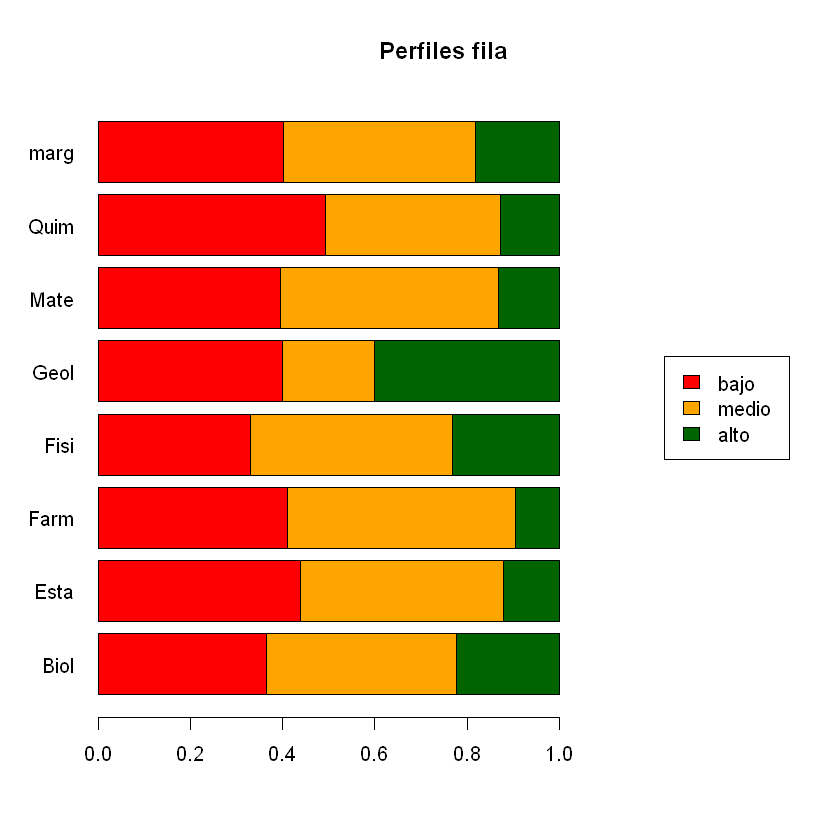

In [5]:
# valores marginales por filas
Dn <- diag(rowSums(F))
print("Diagonal de con los valores maginales por filas:")
round(Dn*100,1)

# perfil fila
perFila <- solve(Dn)%*%F
rownames(perFila)<-rownames(F)
colnames(perFila)<-colnames(F)
print("Perfiles fila:")
round(perFila*100,1)

# gráfica de los perfiles
plotct(K,"row",col=c("red","orange","darkgreen"),main="Perfiles fila") #función de FactoClass

## <span style="color:#4361EE">Perfiles columna</span>


Sea $\mathbf{D}_p = diag(f_{\cdot j})$, los perfiles columna son $\mathbf{D}_p^{-1} \mathbf{F'}$ (puestos como filas): 


[1] "Valores maginales por columna:"


,Biol,Esta,Farm,Fisi,Geol,Mate,Quim,marg
bajo,36.5,43.9,41.1,32.9,40,39.6,49.2,40.2
medio,41.3,43.9,49.3,43.9,20,47.2,38.1,41.6
alto,22.2,12.1,9.6,23.2,40,13.2,12.7,18.2


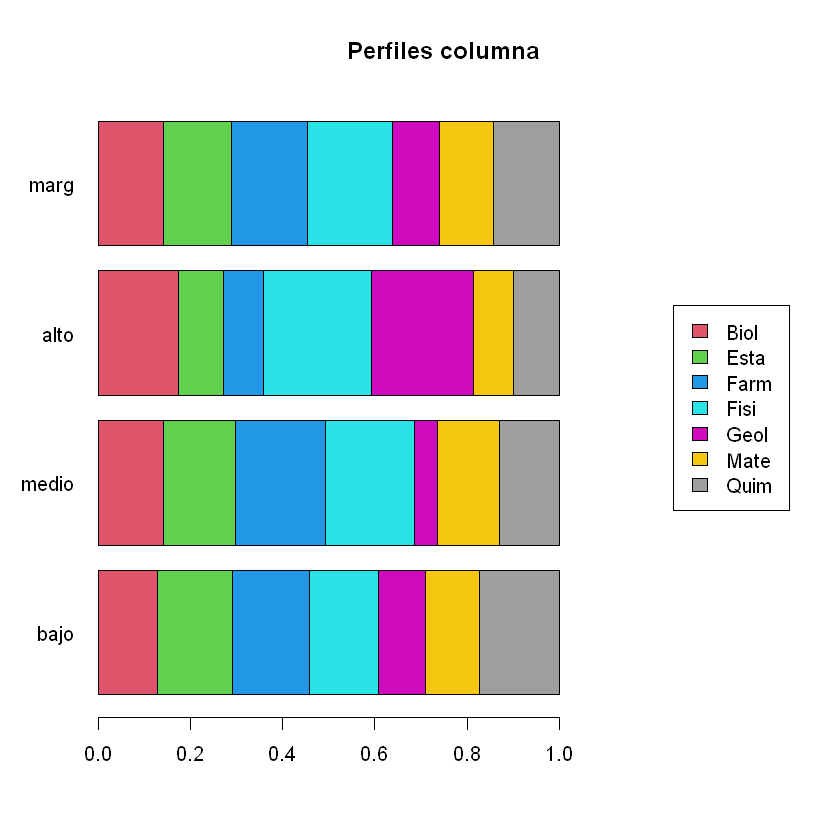

In [6]:
plotct(t(K),"row",col=2:8,tables=TRUE,main="Perfiles columna")->tab #función de FactoClass
Dp<-diag(colSums(F))
print("Valores maginales por columna:")
tab$perC

## <span style="color:#4361EE">El modelo de independencia</span>


Sea $a_{ij}=f_{i\cdot}f_{\cdot j}$, el término general de la tabla de independencia $\mathbf{A}$ 


In [7]:
A<-diag(Dn)%*%t(diag(Dp))
colnames(A)<-colnames(F)
round(cbind(F,A,F-A)*100,2)

,bajo,medio,alto,bajo,medio,alto,bajo,medio,alto
Biol,5.17,5.84,3.15,5.69,5.89,2.58,-0.53,-0.04,0.57
Esta,6.52,6.52,1.80,5.97,6.17,2.70,0.55,0.35,-0.90
Farm,6.74,8.09,1.57,6.60,6.82,2.99,0.14,1.27,-1.41
Fisi,6.07,8.09,4.27,7.41,7.66,3.35,-1.34,0.43,0.92
Geol,4.04,2.02,4.04,4.07,4.20,1.84,-0.02,-2.18,2.20
Mate,4.72,5.62,1.57,4.79,4.95,2.17,-0.07,0.67,-0.59
Quim,6.97,5.39,1.80,5.69,5.89,2.58,1.27,-0.49,-0.78


# <span style="color:#F72585">El ACS como dos ACP</span>


En el ACS (*Análisis de Correspondencias Simple*) se describen simultáneamente los perfiles fila y columna. Para cada tabla de perfiles se realiza un **ACP(X, M, N)**, pero los dos ACP (*Análisis de componentes principales*) están
relacionados, lo que permite representaciones simultáneas de los planos factoriales.

## <span style="color:#4361EE">ACP de los perfiles-fila</span>


$$
ACP(\mathbf{X,M,N}) = ACP(\mathbf{D}_n^{-1}\mathbf{F},\mathbf{D}^{-1}_p,\mathbf{D_n})
$$
- Se analiza la tabla  de perfiles fila, entonces el histograma que respresenta un perfil fila se ve como un punto en $\mathbb{R}^p$.
- La diferencia entre dos histogramas = distancia entre los puntos en $\mathbb{R}^p$.
- Los pesos de los puntos fila: $f_{i\cdot}$ están en la  la matriz diagonal $\mathbf{D_n}$.
- Las distancias entre distribuciones condicionales se definen a partir del producto punto dado por la matriz $\mathbf{D}^{-1}_p$.
- La matriz $\mathbf{D}_n^{-1}\mathbf{F}$ no está centrada.
- El mayor valor propio de la matriz a diagonalizar $\mathbf{F'D_n^{-1}FD_p^{-1}}$ es 1 y el vector propio asociado es el centro de gravedad de la nube.
- Partir del segundo vector propio de esta matriz es equivalente a centrar, logrando una simplificación de las fórmulas del ACS.


<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Machine_Learning/Imagenes/metodosFactoriales.png" alt="Primera imagen" width="800" height="600">
<center>

### <span style="color:#4CC9F0">Nube de perfiles fila</span>


- Coordenadas de los perfiles fila son: $\mathbf{x}_i; i=1,2,\cdots,n$; con:
$$ \mathbf{x}_i(j) = \dfrac{f_{ij}}{f_{i\cdot}}; \ j=1,2,\cdots,p$$
  - Si tomamos $i=3$, se obtiene el perfil de Farmacia cuyas coordenadas son $\mathbf{x}_3 =[ 0.411,0.493, 0.096]'$
    
&nbsp;

- Centro de gravedad:
$$ \mathbf{g}_p = \sum_{i=1}^n f_{i\cdot} \mathbf{x}_i$$
  - La coordenada $j$, notada $ \mathbf{g}_p(j)$, del centro de gravedad es:
$$ 
\mathbf{g}_p(j)=\sum_{i=1}^n f_{i\cdot} \dfrac{f_{ij}}{f_{i\cdot}} = \sum_{i=1}^n f_{ij} = f_{\cdot j}
$$
  - Centro de gravedad = Marginal columna de la tabla **F**, en el ejemplo es $ \mathbf{g}_p =[0.402, 0.416,  0.182]'$

&nbsp;
    
- Distancia entre perfiles fila = distancia $ji$ cuadrado o de Benzècri:
la métrica es $\mathbf{D}^{-1}_p$, elemento diagonal  $\dfrac{1}{f_{\cdot j}}$
$$  
d^2(i,l)=\sum_{j=1}^p \dfrac{1}{f_{\cdot j}} (x_{ij}-x_{lj})^2 =
\sum_{j=1}^p \dfrac{1}{f_{\cdot j}} \left(\dfrac{f_{ij}}{f_{i\cdot}}-\dfrac{f_{lj}}{f_{l\cdot}}\right)^2
$$

-  Amplifica más las diferencias al cuadrado entre coordenadas cuando se deben a columnas de baja frecuencia marginal. 
- La distancia $ji$ cuadrado le confiere al ACS dos propiedades: 
        + La equivalencia distribucional 
        + Las relaciones cuasi-baricéntricas,
        
&nbsp;

- Inercia de la nube de perfiles fila:
$$
Inercia(N_n) = \sum_{i=1}^n f_{i\cdot } d^2(i,\mathbf{g}_p)=
\sum_{i=1}^n f_{i\cdot } \sum_{j=1}^p \dfrac{1}{f_{\cdot j}} \left(\dfrac{f_{ij}}{f_{i\cdot}}-f_{\cdot j}\right)^2=
\sum_{i=1}^n \sum_{j=1}^p  \frac{\left(f_{ij} - f_{i\cdot}f_{\cdot j}\right)^2}{f_{i\cdot}f_{\cdot j}}
$$



### <span style="color:#4CC9F0">Ejes y subespacios vectoriales</span>


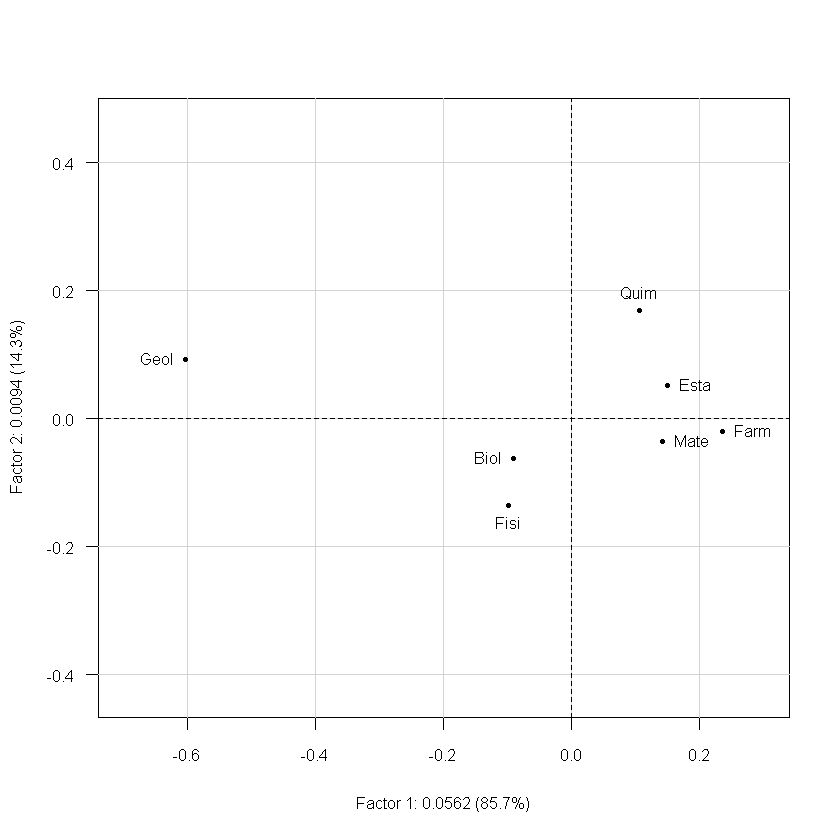

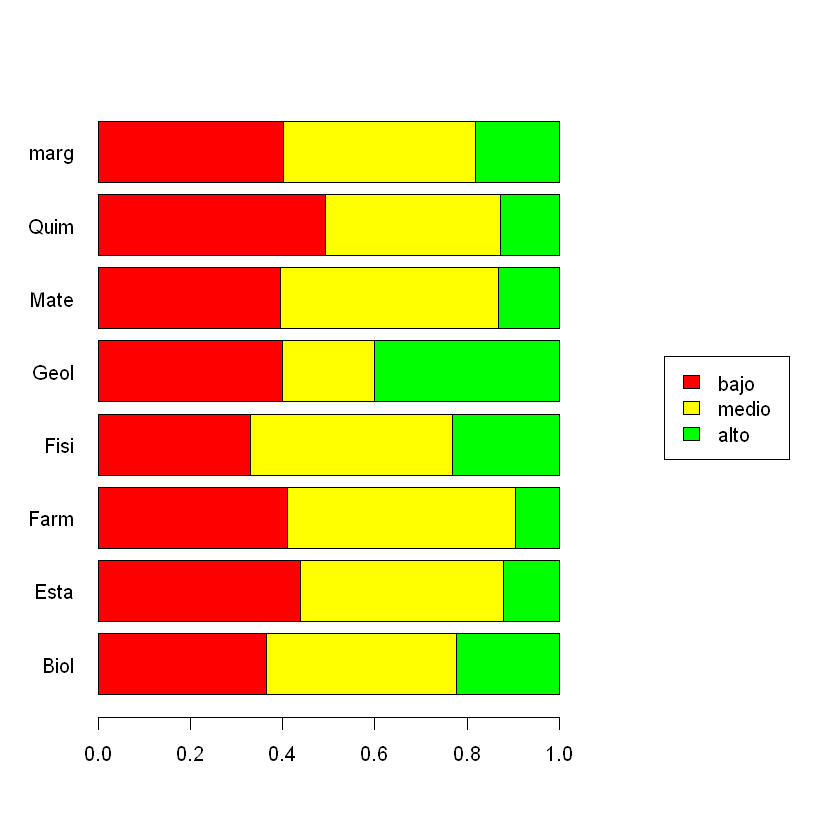

In [8]:
acs<-dudi.coa(K,scannf=FALSE) 
plot(acs,Tcol=FALSE,xlim=c(-0.7,0.3),cframe=1,asp=1) 
plotct(K,"row",col=c("red","yellow","green"))


## <span style="color:#4361EE">ACP de los perfiles-columna</span>



 $$ACP(\mathbf{D}_p^{-1}\mathbf{F'},\mathbf{D}_n^{-1},\mathbf{D}_p)$$
 
- Los histogramas de las distribuciones condicionales columna se representan como puntos en $\mathbb{R}^n$
-  A cada punto $j$ se le asigna el peso $f_{\cdot j}$
-  Este análisis es simétrico al de perfiles fila  


### <span style="color:#4CC9F0">Primer plano factorial de los perfiles de estratos según carreras</span>


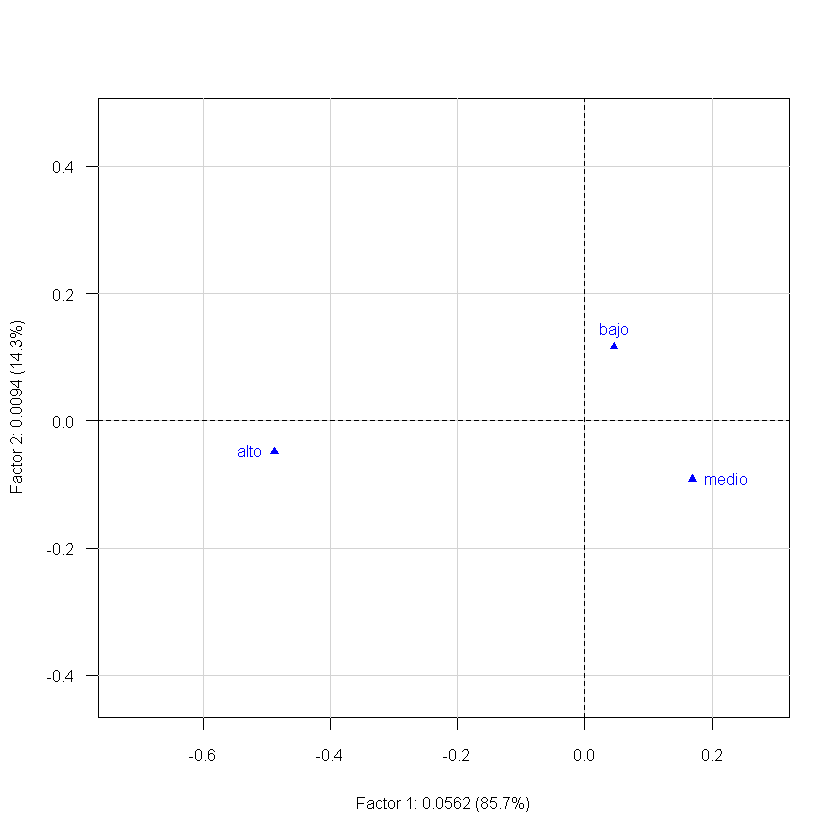

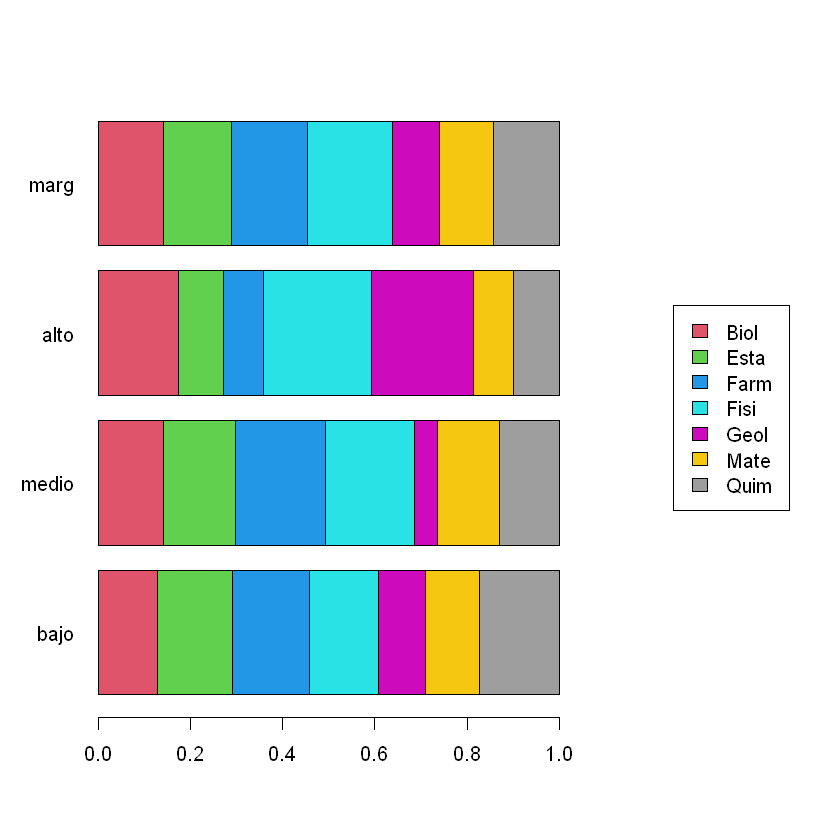

In [9]:
plot(acs,Trow=FALSE,asp=1) 
plotct(t(K),"row",col=2:8)

## <span style="color:#4361EE">El ACS como un ACP(X,M,N)</span>

- El ACS de la tabla $\mathbf{F}$ también se obtiene mediante el ACP de
la tabla $\mathbf{X}$ 
- Usando $\mathbf{N}=\mathbf{D}_n=diag(f_{i\cdot})$, como pesos de las filas y matriz de métrica en el espacio de las columnas.
- Usando $\mathbf{M}=\mathbf{D}_p=diag(f_{\cdot j})$, como pesos de las columnas y matriz de métrica en el espacio de las filas.
- Y usando $
x_{ij} =\frac{f_{ij} -f_{i\cdot} f_{\cdot j} }{f_{i\cdot} f_{\cdot
j} }
$


## <span style="color:#4361EE">Equivalencia distribucional</span>


- El ACS no se modifica si se unen dos puntos que tienen el mismo perfil. 
- El peso del punto colapsado es la suma de los pesos de los puntos que se unen.
- Lo anterior permite unir filas o columnas con perfiles parecidos, para simplificar las tablas originales
    - Por ejemplo las carreras Estadística, Matemáticas y Farmacia; o las carreras Biología y Física 
- Esta propiedad hace que el ACS sea robusto ante la "arbitrariedad" en la conformación de las categorías de una variable en un estudio


## <span style="color:#4361EE">Relaciones cuasibaricéntricas</span>



$$
 F_s(i) = \frac{1}{\sqrt{\lambda_s}}\sum_{j=1}^p{\frac{f_{ij}}{f_{i\cdot}} G_s(j)}
$$ 
$$
  G_s(j) = \frac{1}{\sqrt{\lambda_s}}\sum_{i=1}^n{{\frac{f_{ij}}{f_{\cdot j}}
  F_s(i)}}
$$
- Las relaciones cuasibaricéntricas hacen
posible la representación simultánea y su
interpretación. 
-  Un sumando $j$ es 
$\dfrac{f_{ij}}{f_{i\cdot}} G_s(j)$, donde $\dfrac{f_{ij}}{f_{i\cdot}}$ es la coordenada $j$ del perfil de la fila $i$, es decir la altura de la barra $j$ del histograma.
- Como $\sum\limits_{j=1}^p \frac{f_{ij}}{f_{i\cdot}}=1$, la sumatoria es un promedio ponderado de las coordenadas de las columnas.
- Cada fila tiene un promedio diferente porque las ponderaciones cambian.
- El punto promedio se ubica dentro del polígono que une a los puntos columna, por las dilataciones $\dfrac{1}{\sqrt{\lambda_s}}; s=1,2$, el punto puede ubicarse afuera.

<center>
<img src="https://www.researchgate.net/profile/Alfonso-Zavaleta-3/publication/33552394/figure/fig1/AS:645104205312001@1530816236474/Figura-1-Esquema-de-la-representacion-simultanea-del-analisis-de-correspondencias-simple.png" alt="Relaciones cuasibaricéntricas" width="500" height="450">
<center>

Fuente: [Alfonso Zavaleta](https://www.researchgate.net/profile/Alfonso-Zavaleta-3/publication/33552394/figure/fig1/AS:645104205312001@1530816236474/)

### <span style="color:#4CC9F0">Ejemplo</span>


Coordenada del perfil de Geología sobre el primer eje (-0.604). Teniendo en cuenta que:

-  Perfil de Geología [0.4 0.2 0.4] 
-  Coordenadas de los estratos sobre el primer eje  [0.0458 0.1695 -0.4884] 
-  Primer valor propio = 0.0562  
- La relación de transición que expresa la coordenada del perfil geología en función de las coordenadas de los perfiles columnas es:
$$ \dfrac{1}{\sqrt{0.0562}} * (0.4*0.0458 + 0.2*0.1695 - 0.4*0.4884)=
4.2182 * (0.0118 + 0.0339 - 0.1954) = $$ $$4.2182 * (-0.1497) = -0.6315
$$ 
- El promedio ponderado por el perfil de Geología es -0.1497, se aleja del centro debido  a la la dilatación por 4.2182
- La coordenada de estrato alto es la que más suma, por:  la ponderación (0.4) y es la que está más alejada del origen (-0.4884)


In [10]:
# Haciendo el cálculo
round(1/sqrt(acs$eig[1])*sum(c(0.4,0.2,0.4)*acs$co[,1]),3)


[1] -0.604

### <span style="color:#4CC9F0">Representación simultánea</span>

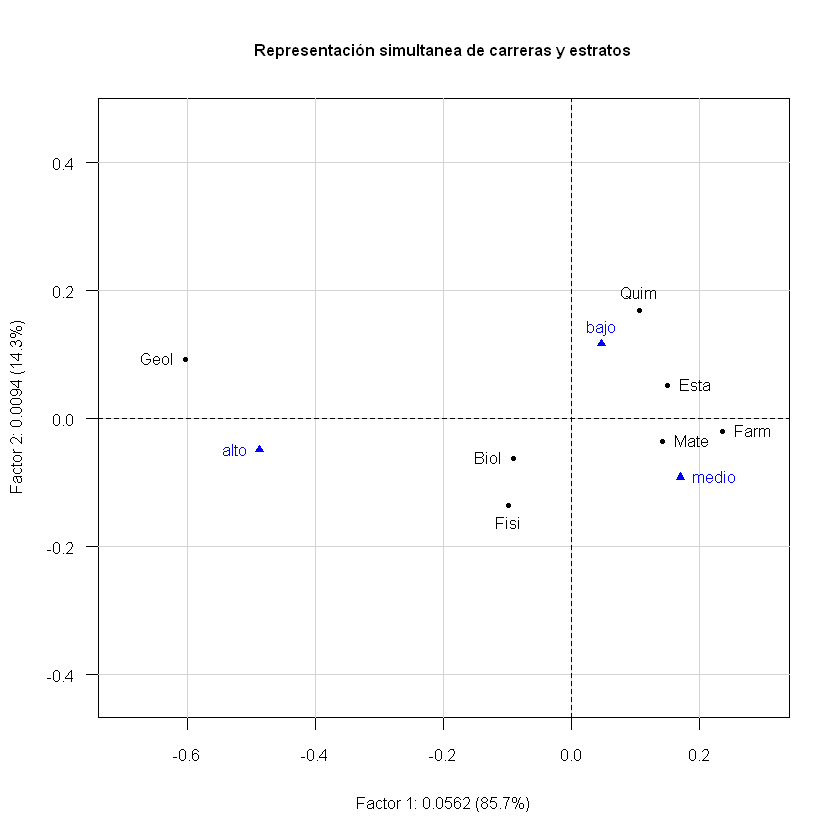

In [11]:
# Representación de carreras y estratos
plot(acs,xlim=c(-0.7,0.3),cframe=1,main="Representación simultanea de carreras y estratos")

In [12]:
ayuacs<-inertia(acs,T,T)
names(ayuacs)
# carreras
round(cbind(acs$li,Ca=ayuacs$row.abs,cos2=ayuacs$row.rel,conInercia=ayuacs$row.contrib),2)
# estratos
round(cbind(acs$co,Ca=ayuacs$col.abs,cos2=ayuacs$col.rel,conInercia=ayuacs$col.contrib),2)

[1] "tot.inertia" "row.contrib" "row.abs"     "row.rel"     "row.cum"    
 [6] "col.contrib" "col.abs"     "col.rel"     "col.cum"     "nf"         
[11] "call"

,Axis1,Axis2,Ca.Axis1,Ca.Axis2,cos2.Axis1,cos2.Axis2,conInercia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Biol,-0.09,-0.06,2.14,5.79,-68.86,-31.14,2.66
Esta,0.15,0.05,5.89,4.39,88.91,11.09,5.67
Farm,0.23,-0.02,16.05,0.67,99.30,-0.70,13.85
Fisi,-0.10,-0.13,3.26,35.61,-35.43,-64.57,7.90
Geol,-0.60,0.09,65.58,9.16,-97.72,2.28,57.50
Mate,0.14,-0.04,4.26,1.57,94.20,-5.80,3.87
Quim,0.11,0.17,2.82,42.81,28.29,71.71,8.55


,Comp1,Comp2,Ca.Axis1,Ca.Axis2,cos2.Axis1,cos2.Axis2,conInercia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bajo,0.05,0.12,1.50,58.27,13.35,86.65,9.63
medio,0.17,-0.09,21.26,37.17,77.39,-22.61,23.54
alto,-0.49,-0.05,77.24,4.56,-99.02,-0.98,66.83


Imprimiendo el objeto **acs** podemos obtener una lista de todas las características extraibles de este objeto:

In [13]:
acs

Duality diagramm
class: coa dudi
$call: dudi.coa(df = K, scannf = FALSE)

$nf: 2 axis-components saved
$rank: 2
eigen values: 0.0562 0.009393
  vector length mode    content       
1 $cw    3      numeric column weights
2 $lw    7      numeric row weights   
3 $eig   2      numeric eigen values  

  data.frame nrow ncol content             
1 $tab       7    3    modified array      
2 $li        7    2    row coordinates     
3 $l1        7    2    row normed scores   
4 $co        3    2    column coordinates  
5 $c1        3    2    column normed scores
other elements: N 

## <span style="color:#4361EE">Ayudas para la interpretación</span>


- **Contribución absoluta** La contribución de un perfil a la varianza del eje (inercia proyectada), depende del peso y de la coordenada al cuadrado: 
$$Ca_s(i) = \dfrac{f_{i\cdot}(F_s(i))^2}{\lambda_s}$$
- **Coseno cuadrado** Calidad de la representación o contribución relativa:
$$Cos^2_s(i) = \dfrac{(F_s(i))^2}{d^2(i,\mathbf{g})}$$
- ¿Por qué cree que se da el nombre de **contribución relativa**?
    $$Cos^2_s(i) = \dfrac{F_s^2(i)}{d^2(i,\mathbf{g})} =  \dfrac{f_{i\cdot} F_s^2(i)} {f_{i\cdot} d^2(i,\mathbf{g})}$$
-  Contribuciones del punto  a la inercia:  proyectada sobre el eje $s$ / en el espacio completo
        - Inercia sobre el eje $s$: $\sum\limits_{i=1}^n f_{i\cdot} F^2_s(i)$
        - Inercia en $\mathbb{R}^p$:  $\sum\limits_{i=1}^n f_{i\cdot} d^2(i,\mathbf{g})$


## <span style="color:#4361EE">Filas y columnas suplementarias</span>


- Se proyectan e interpretan utilizando las fórmulas de transición.
- Su interpretación debe hacerse después de la de los elementos activos.
- AYUDAS
    -  Distancia al origen
    -  Coseno cuadrado
    -  Valor test


## <span style="color:#4361EE">Ejemplo de aplicación</span>


Ver el ejemplo del capítulo 5 del libro [Estadística descriptiva multivariada - Facultad de Ciencias, Campo Elías Pardo](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwi6qZDBjtDzAhVeRTABHYZPBWEQFnoECAYQAQ&url=http%3A%2F%2Fciencias.bogota.unal.edu.co%2Ffileadmin%2FFacultad_de_Ciencias%2FPublicaciones%2FImagenes%2FPortadas_Libros%2FEstadistica%2FEstadistica_descriptiva_multivariada%2FlibroEstadisiticaDescriptivaMultivariadaDigital.pdf&usg=AOvVaw2Q7b-e89FbWXFda5h4sCuf) y los talleres.

### <span style="color:#4CC9F0">Ejercicio</span>



Realizar un análisis de correspondencias simples de una tabla de su interés.